# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

In [148]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [149]:
#sets dataframe 'df' as ab_data csv file

df = pd.read_csv('ab_data.csv')

**b.** Use the cell below to find the number of rows in the dataset.

In [150]:
#looks at shape of df and returns a tuple for (rows, columns) 
df.shape

(294478, 5)

<span style="color:blue;">There are 294,478 rows in the dataset.</span>

**c.** The number of unique users in the dataset.

In [151]:
#returns number of unique values in the user_id column
num_unique = df['user_id'].nunique()
print(f'There are {num_unique} unique user ids')

There are 290584 unique user ids


**d.** The proportion of users converted.

In [152]:
#finds users which were converted/bought the product
num_converted = df.query('converted == 1')

#finds percentage of unique users which bought the product
percent_converted = (len(num_converted)/num_unique)*100

#prints the percentage of users who bought the product
print(f'{percent_converted}% of users were converted.')

12.126269856564711% of users were converted.


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [153]:
#sets amt_treatment_old_page to the count of times where group is treatment but landing_page is not a new page, prints the amount
treatment_old_page = df.query('group == "treatment" & landing_page != "new_page"')
amt_treatment_old_page = len(treatment_old_page)
print(f'There are {amt_treatment_old_page} times where the group is treatment but the landing_page is not a new_page')

There are 1965 times where the group is treatment but the landing_page is not a new_page


**f.** Do any of the rows have missing values?

In [154]:
#checks to see if any of the rows have missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [155]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

#makes a copy of df, saved to df2
df2 = df

In [156]:
#runs a query for the treatment group given the old page, saves to a variable name for the index rows to drop
index_names1 = df2.query('group == "treatment" & landing_page != "new_page"').index

In [157]:
#drops the first set of rows with incorrect values from query written above
df2.drop(index_names1, inplace=True)

In [158]:
#runs a query for the control group given the new page, saves to a variable name for the index rows to drop
index_names2 = df2.query('group == "control" & landing_page != "old_page"').index

In [159]:
#drops the second set of rows with incorrect values from query written above
df2.drop(index_names2, inplace = True)

In [160]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [161]:
#counts number of unique values in the user_id column
df2['user_id'].nunique()

290584

<span style="color:blue;">There are 290,584 unique user_ids.</span>

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [162]:
#locates row where user_id is duplicated
df2.loc[df2.duplicated(subset='user_id'), :]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


<span style="color:blue;">The duplicated row is index 2893 with user_id 773192.</span>

**c.** Display the rows for the duplicate **user_id**? 

In [163]:
#locates row where user_id is duplicated, saves to variable "duplicated"
duplicated = df2.loc[df2.duplicated(subset='user_id'), :]

#prints duplicated row
print(duplicated)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [164]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(index=2893, inplace=True)


In [165]:
# Checks again if the row with a duplicate user_id is deleted or not
df2.loc[df2.duplicated(subset='user_id'), :]

,user_id,timestamp,group,landing_page,converted


<span style="color:blue;">As seen above, the duplicate row as been dropped, as there is nothing displayed when we check again for duplicates in the user_id column.</span>

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [166]:
# probability of user converting regarless of group

prob_converted_all = df2.converted.mean()
print(prob_converted_all)

0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [167]:
# probability of a user in the control group converting

prob_converted_control = (df2.query('group == "control"')['converted']).mean()
print(prob_converted_control)

0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [168]:
prob_converted_treatment = (df2.query('group == "treatment"')['converted']).mean()
print(prob_converted_treatment)

0.11880806551510564


In [169]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups

obs_diff = prob_converted_treatment - prob_converted_control 
print(obs_diff)

-0.0015782389853555567


**d.** What is the probability that an individual received the new page?

In [170]:
(df2.query("landing_page == 'new_page'").user_id.count() / len(df2))

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

<span style="color:blue;">The new landing page for the treatment group does not lead to higher conversion based on the probabilities found above. The old page's conversion rate is still slightly higher than the new page conversion rate.</span>

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<span style="color:blue;">The null hypothesis is the probability of conversion for the new page is less than or equal to the probability of conversion for the old page. </span>

**H(0) = P(new) <= P(old)**

<span style="color:blue;">The alternative hypothesis is the probabililty of conversion for the new page is greater than the probability of conversion for the old page.</span>

**H(1) = P(new) > P(old)**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [171]:
# sets p_new to the mean of the converted users in the treatment group (which is also the conversion rate)

p_new = df2['converted'].mean()
print(f'The conversion rate for P(new) is {p_new}')

The conversion rate for P(new) is 0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [172]:
# sets p_old to the mean of the converted users in the control group (which is also the conversion rate)

p_old = df2['converted'].mean()
print(f'The conversion rate for P(old) is {p_old}')

The conversion rate for P(old) is 0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [173]:
# sets n_new to the number of users in the table in the treatment group

n_new = df2.query('group == "treatment"').shape[0]
print(f'There are {n_new} individuals in the treatment group.')

There are 145310 individuals in the treatment group.


**d.** What is $n_{old}$, the number of individuals in the control group?

In [174]:
# sets n_new to the number of users in the table in the control group

n_old = df2.query('group == "control"').shape[0]
print(f'There are {n_old} individuals in the control group.')

There are 145274 individuals in the control group.


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [175]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.binomial(1, p_new, n_new)

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [176]:
# Simulate a Sample for the control Group
old_page_converted = np.random.binomial(1, p_old, n_old)

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [177]:
#finds probability of new_page_converted

new_page_converted.mean()

0.11830569128071021

In [178]:
#finds probability of old_page_converted

old_page_converted.mean()

0.1194639095777634

In [179]:
#finds converted probability difference (p(new)-p(old))
converted_probability_diff = ((new_page_converted.mean())-(old_page_converted.mean()))
print(converted_probability_diff)

-0.0011582182970531901



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [180]:
#finds sample converted difference 10000 times and assigns the results to p_diffs list

p_diffs = []

for _ in range(10000):
    sample_new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
    sample_old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
    p_diffs = sample_new_page_converted -sample_old_page_converted

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


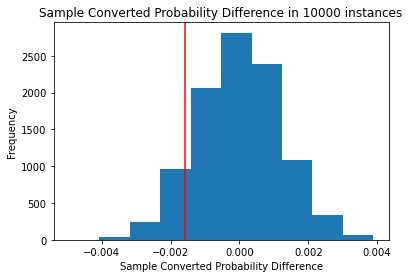

In [181]:
#plots histogram of sample p_diffs
plt.hist(p_diffs)

plt.title("Sample Converted Probability Difference in 10000 instances")
plt.ylabel("Frequency")
plt.xlabel("Sample Converted Probability Difference")

#sets red line on graph representing the actual obsereved difference found in the data
plt.axvline(obs_diff, color='red');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [182]:
#finds proportion of p_diffs which were greater than the actual observed difference in df2

obs_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()

p_diffs = np.array(p_diffs)

proportion_greater_than_obs = (p_diffs > obs_diff).mean()
print(f'The proportion of p_diffs which were greater than the actual observed data from df2 was {proportion_greater_than_obs}')

The proportion of p_diffs which were greater than the actual observed data from df2 was 0.9008


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

<span style="color:blue;">**This value is called p-value**</span>

<span style="color:blue;">When a p-value is **below** 0.05, the null hypothesis can be rejected. Here, our P-value was well above 0.05, which shows the null hypothesis to most likely be true. </span>



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [183]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('converted == 1 and group == "control"'))

# number of conversions with the new_page
convert_new = len(df2.query('converted == 1 and group == "treatment"'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page == "old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "new_page"'))

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---


In [184]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

<span style="color:blue;">This is a right tailed test, which means we would reject the null hypothesis if the Z-score was greater than 1.645. In this case, the z-score indicates we cannot reject the null hypothesis. The p-value is well above 0.05 as well, which also indicates we cannot reject the null hypothesis. This does agree with what we found earlier.</span> 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

A logistic regression, which predicts only two possible outcomes (in this case, converted or not converted). 

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [185]:
# creates new column of default value 1 

df2['intercept'] = 1

In [186]:
# function takes in a dataframe, looks at group column, returns 1 for treatment and 0 otherwise

def ab_page_dummies(df):
    if (df['group'] == "treatment"):
        return 1
    else:
        return 0

In [187]:
# creates a new columns in df2 by applying the conditions in the function above (1 for treatment, 0 otherwise)

df2['ab_page'] = df2.apply(ab_page_dummies, axis=1)

In [188]:
# checking the new columns were added with correct values
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [189]:
# creates a logistic regression to predict whether a customer converts based on receiving the new or old treatment.

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [190]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Feb 2022   Pseudo R-squ.:               8.077e-06
Time:                        15:02:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


<span style="color:blue;">**The hypotheses in the regression model were**</span>

<span style="color:blue;">**H(0): p_new-p_old = 0** <br/></span>
<span style="color:blue;">**H(1): p_new-p_old != 0**</span>

<span style="color:blue;">**The p-value associated with the ab_page is 0.190. This again tells us it is greater than the Type I error rate of 0.05 and therefore we cannot reject the null hypothesis.**</span>

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color:blue;">It's good to add more factors to our regression model because receiving the new or old page might not be the only contributing factor to whether a customer converts.</span>

<span style="color:blue;">There could be a disadvantage to adding terms if we added an excessive number of factors, especially if our data sample size was small. For example, this could lead to multiple collinearity which is when one independent variable is highly correlated with another. When this happens, the statistical significance of the independent variables are undermined.</span>  

<span style="color:blue;">However, in this case adding countries or other factors to our regression will not be disadvantageous.</span>

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [191]:
# Read the countries.csv

countries = pd.read_csv('countries.csv')

In [192]:
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [193]:
# Join with the df2 dataframe
df_merged = df2.merge(countries, on='user_id')

In [194]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [195]:
# Finds unique values in country column
df_merged['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [196]:
# probability a user in the US converted, regardless of page

prob_us_converted = (df_merged.query('country == "US"')['converted']).mean()
print(f'The probability of any user in the US converting is {prob_us_converted}')

The probability of any user in the US converting is 0.1195468006423762


In [197]:
#probability a user in the US shown the new page converted

us_converted_new = (df_merged.query('country == "US" and landing_page == "new_page"')['converted']).mean()
print(f'The probability of a user in the US converting who is shown the new page is {us_converted_new}')

The probability of a user in the US converting who is shown the new page is 0.11846559963887227


In [198]:
# probaility a user in the US shown the old page converted

us_converted_old = (df_merged.query('country == "US" and landing_page == "old_page"')['converted']).mean()
print(f'The probability of a user in the US converting who is shown the old page is {us_converted_old}')

The probability of a user in the US converting who is shown the old page is 0.12062998938220143


In [199]:
# probability a user in the UK converted, regardless of page

prob_uk_converted = (df_merged.query('country == "UK"')['converted']).mean()
print(f'The probability of a user in the UK converting, regarless of page, is {prob_uk_converted}')

The probability of a user in the UK converting, regarless of page, is 0.12059448568984076


In [200]:
#probability of a user in the UK converting who is shown the new page

uk_converted_new = (df_merged.query('country == "UK" and landing_page == "new_page"')['converted']).mean()
print(f'The probability of a user in the UK converting who is shown the new page is {uk_converted_new}')

The probability of a user in the UK converting who is shown the new page is 0.1211709965102753


In [201]:
#probability a user in the UK converting who is shown the old page

uk_converted_old = (df_merged.query('country == "UK" and landing_page == "old_page"')['converted']).mean()
print(f'The probability of a user in the UK converting who is shown the old page is {uk_converted_old}')

The probability of a user in the UK converting who is shown the old page is 0.12002200220022002


In [202]:
# probability a user in CA converted, regardless of page

prob_ca_converted = (df_merged.query('country == "CA"')['converted']).mean()
print(f'The probability of a user in CA converting, regardless of page, is {prob_ca_converted}')

The probability of a user in CA converting, regardless of page, is 0.11531829781364232


In [203]:
# probability a user in CA converted who was shown the new page

ca_converted_new = (df_merged.query('country == "CA" and landing_page == "new_page"')['converted']).mean()
print(f'The probability of a user in CA converting who is shown the new page is {ca_converted_new}')

The probability of a user in CA converting who is shown the new page is 0.11190247911245035


In [204]:
# probability a user in CA converted who was shown the old page

ca_converted_old = (df_merged.query('country == "CA" and landing_page == "old_page"')['converted']).mean()
print(f'The probability of a user in CA converting who is shown the old page is {ca_converted_old}')

The probability of a user in CA converting who is shown the old page is 0.11878299527646569


<span style="color:blue;">**Based on the probabilties above, it appears user across each country have similar conversion rates across the board.**</span>

<span style="color:blue;">**There are slight differences, such as a user ion the UK having a slightly higher conversion rate with the new page compared to users in other countries, and a user in the US having a slightly higher conversion rate with the old page compared to the users in other countries, but overall, each of the conversion rates in different countries and diffrerent circumstances are all very similar. Thus, it does not appear the country a user was in affected whether they converted.**</span>

In [205]:
#creates dataframe with dummy values for country column
df_dummies = pd.get_dummies(df_merged, columns=['country'])

#drops country_US dummy values because it is the baseline
df_dummies.drop(columns={"country_US"}, inplace=True)

#checks df_dummies dataframe to ensure the actions above were implemented correctly
df_dummies.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_CA,country_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0


In [206]:
# model for conversion rates of countries

logit_mod2 = sm.Logit(df_dummies['converted'], df_dummies[['intercept', 'ab_page','country_UK', 'country_CA']])
results2 = logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Feb 2022   Pseudo R-squ.:               2.323e-05
Time:                        15:02:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0099      0.013      0.743      0.457      -0.016       0.036
country_CA    -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional 


In [207]:
df_dummies['uk_ab'] = df_dummies['ab_page']*df_dummies['country_UK']

In [208]:
df_dummies['ca_ab'] = df_dummies['ab_page']*df_dummies['country_CA']

In [209]:
df_dummies.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_CA,country_UK,uk_ab,ca_ab
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0,0,0


In [210]:
# Fit your model, and summarize the results - this model looks at UK and CA
logit_mod2 = sm.Logit(df_dummies['converted'], df_dummies[['intercept', 'ab_page','country_UK', 'uk_ab', 'country_CA', 'ca_ab']])
results2 = logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 23 Feb 2022   Pseudo R-squ.:               3.482e-05
Time:                        15:02:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
country_UK    -0.0057      0.019     -0.306      0.760      -0.043       0.031
uk_ab          0.0314      0.027      1.181      0.238      -0.021       0.084
country_CA    -0.0175      0.038     -0.465      0.642      -0.091       0.056
ca_ab         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

# Conclusion

<span style="color:blue;">Based on the results above, it does not appear the country has any significant impact on the conversion rate of users seeing the old or new page. The P-values for each country's interaction with the A/B page on conversion rate are all well over 0.05, showing no significant influence on conversion rate.</span>

<span style="color:blue;">Having looked at all conversion rates throughout this analysis, the null hypothese of the new and old page having the the same outcome on conversion cannot be rejected. </span>

<span style="color:blue;">It is recommended the new landing page be remade or other factors be reworked to increase rate of conversion. </span>